# Get Flight Data from API:  HSL -> PVG

In [ ]:
import http.client

conn = http.client.HTTPSConnection("flight-fare-search.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "e84b140bfemsh424efb53a8d9659p11dcdbjsn7c6d0334b7e6",
    'X-RapidAPI-Host': "flight-fare-search.p.rapidapi.com"
}

conn.request("GET", "/v2/flights?from=HEL&to=PVG&date=2023-10-16&adult=1", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))
with open("source.json","w") as f:
    f.write(data.decode("utf-8"))

{"status":200,"searchData":{"from":"HEL","to":"PVG","date":"2023-10-16","type":"Economy","adult":1,"child":0,"infant":0,"currency":"USD"},"results":[{"id":"671db8c905e35ceed3acd29f2a6ae542835b3a697d059b5b1fcd4cd7e03e6e2c","careerCode":"LH","flight_code":"LH-6051","flight_name":"Lufthansa","stops":"2 Stops","cabinType":"Economy","baggage":{"cabin":{"qty":1,"unit":"KG","text":"7 KG","allowance":7},"checkIn":{"allowance":1,"qty":"N","unit":null,"text":"1 PIECE","refNumber":1,"quantity":1}},"currency":"USD","departureAirport":{"time":"2023-10-16T17:20:00","code":"HEL","tz":"Europe/Helsinki","timeZone":"2.00","type":"1","label":"Helsinki-Vantaa Airport","country":{"label":"Finland","code":"FI"},"city":"Helsinki"},"arrivalAirport":{"time":"2023-10-18T14:50:00","code":"PVG","tz":"Asia/Shanghai","timeZone":"8.00","type":"1","label":"Shanghai Pudong International Airport","country":{"label":"China","code":"CN"},"city":"Shanghai"},"path":["LH-6051","LH-801","LH-732"],"duration":{"text":"40h 30m"

# Handling JSON Response

In [ ]:
import json
import csv

# load flight raw JSON data
with open("source.json") as f:
    json_str = f.readline()
    data = json.loads(json_str)

fieldnames = [
    "Price",
    "Currency",
    "Airlines",
    "Departure Time",
    "Departure Timezone",
    "Arrival Time",
    "Arrival Timezone",
    "Duration of Flight",
    "Number of Stops",
    "Stop Summary",
    "Layover Time",
]

buffer = []

with open('data.csv', 'w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for f in data["results"]:
        # retrieve data
        price = format(f["totals"]["total"], '.2f')
        currency = f["totals"]["currency"]
        number_of_stops = "0" if f["stops"].split()[0] == "Direct" else f["stops"].split()[0]
        airlines = f["flight_name"]
        departure_time = f["departureAirport"]["time"]
        departure_timezone = f["departureAirport"]["tz"]
        arrival_time = f["arrivalAirport"]["time"]
        arrival_timezone = f["arrivalAirport"]["tz"]
        duration_of_flight = f["duration"]["value"]
        stop_summary = f["stopSummary"]
        if number_of_stops == "Direct":
            layover_time = 0
        else:
            layover_time = 0
            for stop in stop_summary.values():
                layover_time += stop["stopDuration"]
        flight_info = {
            "Price": price,
            "Currency": currency,
            "Airlines": airlines,
            "Departure Time": departure_time,
            "Departure Timezone": departure_timezone,
            "Arrival Time": arrival_time,
            "Arrival Timezone": arrival_timezone,
            "Duration of Flight": duration_of_flight,
            "Number of Stops": number_of_stops,
            "Stop Summary": stop_summary,
            "Layover Time": layover_time,
        }
        writer.writerow(flight_info)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [ ]:
# Read the data set of "flight" in data.
data = pd.read_csv("data.csv")

In [ ]:
data.head()

,Price,Currency,Airlines,Departure Time,Departure Timezone,Arrival Time,Arrival Timezone,Duration of Flight,Number of Stops,Stop Summary,Layover Time
0,636.48,USD,Lufthansa,2023-09-30T12:50:00,Europe/Helsinki,2023-10-01T15:20:00,Asia/Shanghai,1290,1,"{'0': {'airport': 'MUC', 'stopDuration': 450}}",450
1,644.64,USD,Lufthansa,2023-09-30T18:10:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,940,1,"{'0': {'airport': 'FRA', 'stopDuration': 75}}",75
2,644.64,USD,China Eastern,2023-09-30T16:00:00,Europe/Helsinki,2023-10-01T15:40:00,Asia/Shanghai,1120,1,"{'0': {'airport': 'LHR', 'stopDuration': 255}}",255
3,660.96,USD,Lufthansa,2023-09-30T07:00:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,1610,2,"{'0': {'airport': 'CPH', 'stopDuration': 255},...",710
4,663.68,USD,Lufthansa,2023-09-30T13:40:00,Europe/Helsinki,2023-10-01T15:20:00,Asia/Shanghai,1240,2,"{'0': {'airport': 'FRA', 'stopDuration': 60}, ...",345


In [ ]:
# normalize calculate the frequency
data.Airlines.value_counts(normalize=True)

Airlines
Lufthansa                   0.435484
Scandinavian Airlines       0.112903
Air China                   0.112903
KLM Royal Dutch Airlines    0.080645
China Eastern               0.048387
Air France                  0.048387
Cathay Pacific              0.048387
Finnair                     0.032258
Turkish Airlines            0.032258
British Airways             0.016129
Etihad Airways              0.016129
Qatar Airways               0.016129
Name: proportion, dtype: float64

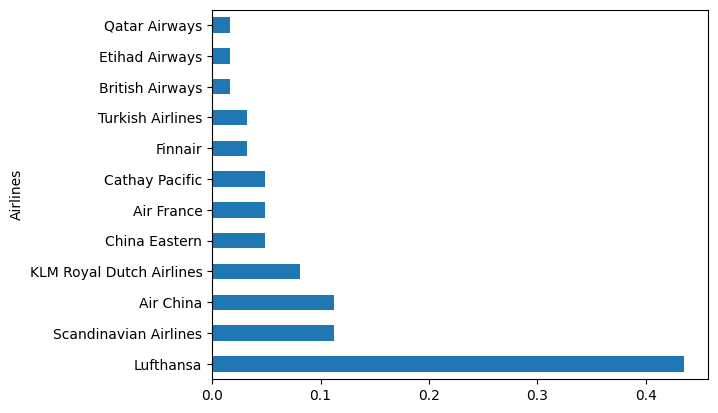

In [ ]:
#plot the bar graph of percentage Airlines categories
data.Airlines.value_counts(normalize=True).plot.barh()
plt.show()

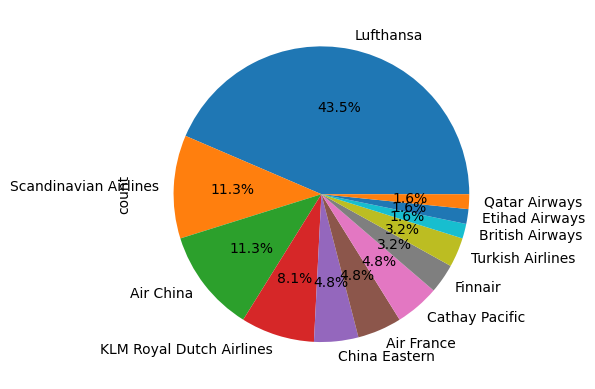

In [ ]:
#plot the bar graph of percentage Airlines categories
data.Airlines.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [ ]:
#calculate the percentage of each Number of stops category.
data["Number of Stops"].value_counts(normalize=True)

Number of Stops
2    0.693548
1    0.306452
Name: proportion, dtype: float64

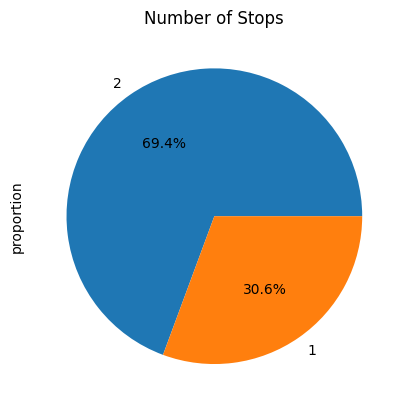

In [ ]:
#plot the pie chart of Number of stops category.
data["Number of Stops"].value_counts(normalize=True).plot.pie(autopct="%1.1f%%")
plt.title("Number of Stops")
plt.show()

In [ ]:
data.Price.describe()

count      62.000000
mean     1135.249032
std       956.002311
min       636.480000
25%       732.360000
50%       792.880000
75%      1153.280000
max      7518.080000
Name: Price, dtype: float64

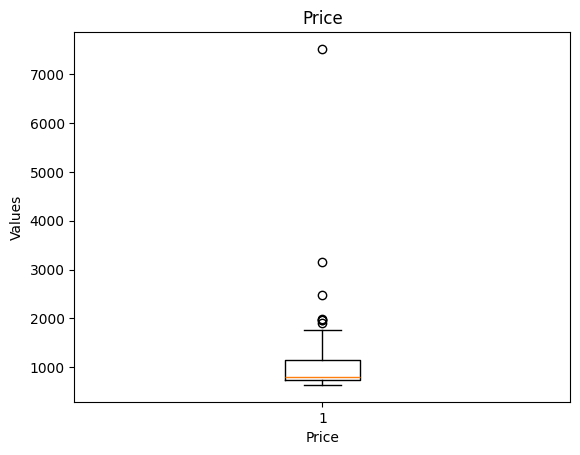

In [ ]:
plt.boxplot(data.Price)
plt.xlabel('Price')
plt.ylabel('Values')
plt.title('Price')
plt.show()

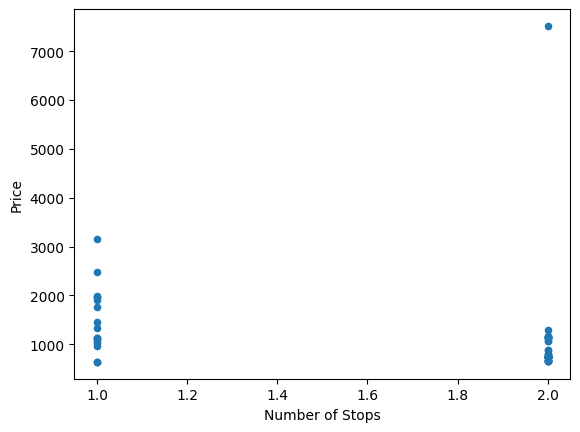

In [ ]:
#plot the scatter plot of Number of Stops and Price variable in data
data.plot.scatter(x="Number of Stops", y="Price", )
plt.show()

# Flight Search and Sorting

Your code should be able to perform the following task to give the user the list of “ideal”
flight to the chosen city:

- The user inputs certain preferences for the flight, e.g., price ranges, trip duration ranges
  (how long from departure to destination), whether the flight is direct or has one or
  more stops (if it has stops then layover duration), flight company from available options
  etc.
- The user can choose the criteria based on which the flights should be sorted.
- The code returns the sorted list of all flights based on the above criteria.
- The user should be able to input the earliest convenient time of departure on the
  departure day from your list, maximum travel time (trip duration from departure to
  destination) and choose a preferred airline company from available options and get
  the following information:

  - Cheapest flight for the preselected data with the following details:
    - Total duration of the flight?
    - Whether the cheapest flight is direct or has one or more stops?
    - If it is not direct how long is the layover and in which city? If it has
      multiple stops, print all layovers.
    - Type of the aircraft where available, etc.
  - Fastest flight for the preselected data with the same details as above.


In [ ]:
# The user inputs certain preferences for the flight, e.g., price ranges,
price_filtered_flights = data[(data['Price'] >= 100.0) & (data['Price'] <= 2000.0)]
price_filtered_flights

,Price,Currency,Airlines,Departure Time,Departure Timezone,Arrival Time,Arrival Timezone,Duration of Flight,Number of Stops,Stop Summary,Layover Time
0,636.48,USD,Lufthansa,2023-09-30T12:50:00,Europe/Helsinki,2023-10-01T15:20:00,Asia/Shanghai,1290,1,"{'0': {'airport': 'MUC', 'stopDuration': 450}}",450
1,644.64,USD,Lufthansa,2023-09-30T18:10:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,940,1,"{'0': {'airport': 'FRA', 'stopDuration': 75}}",75
2,644.64,USD,China Eastern,2023-09-30T16:00:00,Europe/Helsinki,2023-10-01T15:40:00,Asia/Shanghai,1120,1,"{'0': {'airport': 'LHR', 'stopDuration': 255}}",255
3,660.96,USD,Lufthansa,2023-09-30T07:00:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,1610,2,"{'0': {'airport': 'CPH', 'stopDuration': 255},...",710
4,663.68,USD,Lufthansa,2023-09-30T13:40:00,Europe/Helsinki,2023-10-01T15:20:00,Asia/Shanghai,1240,2,"{'0': {'airport': 'FRA', 'stopDuration': 60}, ...",345
5,663.68,USD,Lufthansa,2023-09-30T13:40:00,Europe/Helsinki,2023-10-01T15:20:00,Asia/Shanghai,1240,2,"{'0': {'airport': 'FRA', 'stopDuration': 120},...",345
6,663.68,USD,Lufthansa,2023-09-30T12:50:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,1260,2,"{'0': {'airport': 'MUC', 'stopDuration': 155},...",335
7,663.68,USD,Lufthansa,2023-09-30T12:50:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,1260,2,"{'0': {'airport': 'MUC', 'stopDuration': 275},...",335
8,663.68,USD,Lufthansa,2023-09-30T12:50:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,1260,2,"{'0': {'airport': 'MUC', 'stopDuration': 215},...",335
9,669.12,USD,Lufthansa,2023-09-30T18:10:00,Europe/Helsinki,2023-10-02T15:20:00,Asia/Shanghai,2410,2,"{'0': {'airport': 'FRA', 'stopDuration': 690},...",1515


In [ ]:
# trip duration ranges
duration_filtered_flights = data[(data['Duration of Flight'] >= 100.0) & (data['Duration of Flight'] <= 1000.0)]
duration_filtered_flights

,Price,Currency,Airlines,Departure Time,Departure Timezone,Arrival Time,Arrival Timezone,Duration of Flight,Number of Stops,Stop Summary,Layover Time
1,644.64,USD,Lufthansa,2023-09-30T18:10:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,940,1,"{'0': {'airport': 'FRA', 'stopDuration': 75}}",75
36,1039.04,USD,Finnair,2023-09-30T00:35:00,Europe/Helsinki,2023-09-30T22:05:00,Asia/Shanghai,990,1,"{'0': {'airport': 'HKG', 'stopDuration': 85}}",85
55,1898.56,USD,Turkish Airlines,2023-09-30T19:40:00,Europe/Helsinki,2023-10-01T16:45:00,Asia/Shanghai,965,1,"{'0': {'airport': 'IST', 'stopDuration': 120}}",120


In [ ]:
# Search Finnair Airlines
airline = 'Finnair'
delta_flights = data[data['Airlines'] == airline]
delta_flights

,Price,Currency,Airlines,Departure Time,Departure Timezone,Arrival Time,Arrival Timezone,Duration of Flight,Number of Stops,Stop Summary,Layover Time
35,1028.16,USD,Finnair,2023-09-30T00:35:00,Europe/Helsinki,2023-09-30T23:50:00,Asia/Shanghai,1095,1,"{'0': {'airport': 'HKG', 'stopDuration': 215}}",215
36,1039.04,USD,Finnair,2023-09-30T00:35:00,Europe/Helsinki,2023-09-30T22:05:00,Asia/Shanghai,990,1,"{'0': {'airport': 'HKG', 'stopDuration': 85}}",85


In [ ]:
# search stop once flight
direct_flights = data[data['Number of Stops'] == 1]
direct_flights

,Price,Currency,Airlines,Departure Time,Departure Timezone,Arrival Time,Arrival Timezone,Duration of Flight,Number of Stops,Stop Summary,Layover Time
0,636.48,USD,Lufthansa,2023-09-30T12:50:00,Europe/Helsinki,2023-10-01T15:20:00,Asia/Shanghai,1290,1,"{'0': {'airport': 'MUC', 'stopDuration': 450}}",450
1,644.64,USD,Lufthansa,2023-09-30T18:10:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,940,1,"{'0': {'airport': 'FRA', 'stopDuration': 75}}",75
2,644.64,USD,China Eastern,2023-09-30T16:00:00,Europe/Helsinki,2023-10-01T15:40:00,Asia/Shanghai,1120,1,"{'0': {'airport': 'LHR', 'stopDuration': 255}}",255
34,968.32,USD,British Airways,2023-09-30T08:00:00,Europe/Helsinki,2023-10-01T07:55:00,Asia/Shanghai,1135,1,"{'0': {'airport': 'LHR', 'stopDuration': 195}}",195
35,1028.16,USD,Finnair,2023-09-30T00:35:00,Europe/Helsinki,2023-09-30T23:50:00,Asia/Shanghai,1095,1,"{'0': {'airport': 'HKG', 'stopDuration': 215}}",215
36,1039.04,USD,Finnair,2023-09-30T00:35:00,Europe/Helsinki,2023-09-30T22:05:00,Asia/Shanghai,990,1,"{'0': {'airport': 'HKG', 'stopDuration': 85}}",85
39,1090.72,USD,Air China,2023-09-30T13:40:00,Europe/Helsinki,2023-10-01T12:55:00,Asia/Shanghai,1095,1,"{'0': {'airport': 'FRA', 'stopDuration': 285}}",285
41,1117.92,USD,Air France,2023-09-30T17:45:00,Europe/Helsinki,2023-10-01T16:55:00,Asia/Shanghai,1090,1,"{'0': {'airport': 'CDG', 'stopDuration': 155}}",155
42,1117.92,USD,KLM Royal Dutch Airlines,2023-09-30T07:00:00,Europe/Helsinki,2023-10-01T09:25:00,Asia/Shanghai,1285,1,"{'0': {'airport': 'AMS', 'stopDuration': 415}}",415
43,1117.92,USD,KLM Royal Dutch Airlines,2023-09-30T18:10:00,Europe/Helsinki,2023-10-02T09:25:00,Asia/Shanghai,2055,1,"{'0': {'airport': 'AMS', 'stopDuration': 1190}}",1190


In [ ]:
# set sorted index as Price
sorted_flight = data.set_index("Price", inplace=False)
# sorted descending
desc_sorted = sorted_flight.sort_index(ascending=False)
desc_sorted

,Currency,Airlines,Departure Time,Departure Timezone,Arrival Time,Arrival Timezone,Duration of Flight,Number of Stops,Stop Summary,Layover Time
Price,,,,,,,,,,
7518.08,USD,Cathay Pacific,2023-09-30T07:40:00,Europe/Helsinki,2023-10-01T20:15:00,Asia/Shanghai,1895,2,"{'0': {'airport': 'FRA', 'stopDuration': 690},...",810
3160.64,USD,China Eastern,2023-09-30T06:20:00,Europe/Helsinki,2023-10-01T14:40:00,Asia/Shanghai,1640,1,"{'0': {'airport': 'CDG', 'stopDuration': 770}}",770
2483.36,USD,Turkish Airlines,2023-09-30T12:55:00,Europe/Helsinki,2023-10-01T16:45:00,Asia/Shanghai,1370,1,"{'0': {'airport': 'IST', 'stopDuration': 520}}",520
1982.88,USD,Air China,2023-09-30T08:00:00,Europe/Helsinki,2023-10-01T05:50:00,Asia/Shanghai,1010,1,"{'0': {'airport': 'MXP', 'stopDuration': 145}}",145
1974.72,USD,Air China,2023-09-30T08:00:00,Europe/Helsinki,2023-10-01T06:45:00,Asia/Shanghai,1065,1,"{'0': {'airport': 'LHR', 'stopDuration': 205}}",205
...,...,...,...,...,...,...,...,...,...,...
663.68,USD,Lufthansa,2023-09-30T13:40:00,Europe/Helsinki,2023-10-01T15:20:00,Asia/Shanghai,1240,2,"{'0': {'airport': 'FRA', 'stopDuration': 60}, ...",345
660.96,USD,Lufthansa,2023-09-30T07:00:00,Europe/Helsinki,2023-10-01T14:50:00,Asia/Shanghai,1610,2,"{'0': {'airport': 'CPH', 'stopDuration': 255},...",710
644.64,USD,China Eastern,2023-09-30T16:00:00,Europe/Helsinki,2023-10-01T15:40:00,Asia/Shanghai,1120,1,"{'0': {'airport': 'LHR', 'stopDuration': 255}}",255


In [ ]:

earliest_departure_time = '2023-09-30T07:40:00'  # Earliest departure time
maximum_travel_duration = 2000  # Maximum travel duration
preferred_airline = 'Air China'  # Preferred Airline

# 根据条件筛选数据
filtered_flights = data[(pd.to_datetime(data['Departure Time']) >= pd.to_datetime(earliest_departure_time)) &
                        (data['Duration of Flight'] <= maximum_travel_duration) &
                        (data['Airlines'] == preferred_airline)]
filtered_flights

,Price,Currency,Airlines,Departure Time,Departure Timezone,Arrival Time,Arrival Timezone,Duration of Flight,Number of Stops,Stop Summary,Layover Time
39,1090.72,USD,Air China,2023-09-30T13:40:00,Europe/Helsinki,2023-10-01T12:55:00,Asia/Shanghai,1095,1,"{'0': {'airport': 'FRA', 'stopDuration': 285}}",285
40,1115.20,USD,Air China,2023-09-30T13:40:00,Europe/Helsinki,2023-10-01T19:40:00,Asia/Shanghai,1500,2,"{'0': {'airport': 'FRA', 'stopDuration': 290},...",655
51,1289.28,USD,Air China,2023-09-30T13:40:00,Europe/Helsinki,2023-10-01T22:35:00,Asia/Shanghai,1675,2,"{'0': {'airport': 'FRA', 'stopDuration': 290},...",820
53,1463.36,USD,Air China,2023-09-30T13:40:00,Europe/Helsinki,2023-10-01T12:55:00,Asia/Shanghai,1095,1,"{'0': {'airport': 'FRA', 'stopDuration': 285}}",285
56,1963.84,USD,Air China,2023-09-30T07:40:00,Europe/Helsinki,2023-10-01T12:55:00,Asia/Shanghai,1455,1,"{'0': {'airport': 'FRA', 'stopDuration': 640}}",640
57,1974.72,USD,Air China,2023-09-30T08:00:00,Europe/Helsinki,2023-10-01T06:45:00,Asia/Shanghai,1065,1,"{'0': {'airport': 'LHR', 'stopDuration': 205}}",205
58,1982.88,USD,Air China,2023-09-30T08:00:00,Europe/Helsinki,2023-10-01T05:50:00,Asia/Shanghai,1010,1,"{'0': {'airport': 'MXP', 'stopDuration': 145}}",145


In [ ]:
if len(filtered_flights) != 0:
    cheapest_flight = filtered_flights.sort_values(by='Price').iloc[0]
    print("The cheapest flight:")
    print("Price:", cheapest_flight['Price'])
    print("Total duration of the flight:", cheapest_flight['Duration of Flight'])
    print("Flight stops number:", cheapest_flight['Number of Stops'])
    if cheapest_flight['Number of Stops'] != 0:
        print("Layover City:", cheapest_flight['Stop Summary'])
else:
    print("NOT FOUND!")

The cheapest flight:
Price: 1090.72
Total duration of the flight: 1095
Flight stops number: 1
Layover City: {'0': {'airport': 'FRA', 'stopDuration': 285}}


In [ ]:
if len(filtered_flights) != 0:
    fastest_flight = filtered_flights.sort_values(by='Duration of Flight').iloc[0]
    print("The fastest flight:")
    print("Price:", fastest_flight['Price'])
    print("Total duration of the flight:", fastest_flight['Duration of Flight'])
    print("Flight stops number:", fastest_flight['Number of Stops'])
    if fastest_flight['Number of Stops'] != 0:
        print("Layover City:", fastest_flight['Stop Summary'])
else:
    print("NOT FOUND!")

The fastest flight:
Price: 1982.88
Total duration of the flight: 1010
Flight stops number: 1
Layover City: {'0': {'airport': 'MXP', 'stopDuration': 145}}
